# *Statistics coded:* Migration and migrant population statistics

Prepared by [A.Kalbassou](akalbassou@gmail.com) ([EMOS](https://ec.europa.eu/eurostat/web/european-statistical-system/emos)).

This notebook aims at reproducing the figures of the _Statistics Explained_ article on [**migration and migrant population statistics**](https://ec.europa.eu/eurostat/statistics-explained/index.php?title=Migration_and_migrant_population_statistics).

## Settings

### Import necessary packages and set global properties

In [1]:
## pip install eurostatapiclient

In [2]:
from eurostatapiclient import EurostatAPIClient
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import matplotlib.patches as mpatches
from sklearn.linear_model import LinearRegression

In [3]:
legend_properties = {'weight':'bold','size':'12'}
countries_names = {'AT':'Austria', 'BE':'Belgium', 'BG':'Bulgaria', 'CY': 'Cyprus', 'CZ': 'Czechia', 'DE': 'Germany', 'DK':
            'Denmark', 'EE':'Estonia', 'EL': 'Greece', 'ES':'Spain', 'FI':'Finland', 'FR':'France', 'HR':'Croatia', 
            'HU':'Hungary', 'IE':'Ireland', 'IT':'Italy', 'LT':'Lithuania', 'LU':'Luxembourg', 'LV':'Latvia', 'MT':
            'Malta', 'NL':'Netherlands', 'PL':'Poland', 'PT':'Portugal', 'RO':'Romania', 'SE':'Sweden', 'SI':'Slovenia',
            'SK':'Slovakia', 'UK':'United Kingdom', 'EU28': 'EU-28'}
#countries_abbr = ['AT','BE','BG','CY','CZ','DE','DK','EE','EL','ES','FI',
#                  'FR','HR','HU','IE','IT','LT','LU','LV','NV','NL','PL','PT','RO','SE','SI','SK','UK','MT', 'EU28']
countries_abbr = ['AT','BE','BG','CH','CY','CZ','DE','DK','EE','EL','ES','FI','FR','HR','HU','IE','IS','IT','LI','LT',
                  'LU','LV','MT','NL','NO','PL','PT','RO','SE','SI','SK','UK']

In [4]:
len(countries_abbr)

32

#### Set up eurostatapiclinet by supplying settings, which will stay the same throught

In [5]:
#Set versions and formats, so far only the ones used here are availeable and call client
VERSION = 'v2.1'
FORMAT = 'json'
LANGUAGE = 'en'
client = EurostatAPIClient(VERSION, FORMAT, LANGUAGE)

#### Request and wrangle data so that it is usable, by pivoting dataframe, and sorting it for graphing

###### Immigration

In [6]:
#df1 manipulation
# migr_imm1ctz?citizen=TOTAL&agedef=COMPLET&precision=1&sex=T&unit=NR&time=2018&age=TOTAL
params_df_1 = {
    'citizen': 'TOTAL',
    'agedef':'COMPLET',
    'precision': 1,
    'sex':'T',
    'time': '2018',
    'age':'TOTAL',
    #'geo':countries_abbr,
    #'unit':'NR'
}
dataframe_1 = client.get_dataset('migr_imm1ctz', params=params_df_1).to_dataframe()
dataframe_1 = dataframe_1.drop(['citizen', 'agedef','age','unit','sex','time'], axis=1)
dataframe_1 = dataframe_1.sort_values(by = "geo")

In [7]:
# Rename the column 
dataframe_1 = dataframe_1.rename(columns={'values': 'migration'})

In [8]:
dataframe_1.head()

,migration,geo
0,105633,AT
1,137860,BE
2,29559,BG
3,144857,CH
4,23442,CY


##### Population

In [9]:
#df1 manipulation
# migr_pop1ctz?citizen=TOTAL&precision=1&sex=T&unit=NR&time=2018&age=TOTAL
params_df_2 = {
    'citizen': 'TOTAL',
    'precision': 1,
    'sex':'T',
    'unit':'NR',
    'time':'2018',
    'age':'TOTAL',
    #'geo':countries_abbr,
}
dataframe_2 = client.get_dataset('migr_pop1ctz', params=params_df_2).to_dataframe()
dataframe_2 = dataframe_2.dropna()
dataframe_2 = dataframe_2.drop(index = 38)
dataframe_2.index = range(0,len(dataframe_2))
dataframe_2 = dataframe_2.drop(['citizen','age','unit','sex','time'], axis=1)
dataframe_2 = dataframe_2.sort_values(by = "geo")
#dataframe_2 = dataframe_2.drop(index = 31)


In [10]:
dataframe_2 = dataframe_2.rename(columns={'values': 'population'})

In [11]:
dataframe_2.head()

,population,geo
0,8822267.0,AT
1,11398589.0,BE
2,7050034.0,BG
3,8484130.0,CH
4,864236.0,CY


##### merging the two tables and calculating the rate of migrants

In [14]:
data_final = pd.merge(dataframe_1,dataframe_2)

In [15]:
data_final.head()

,migration,geo,population
0,105633,AT,8822267.0
1,137860,BE,11398589.0
2,29559,BG,7050034.0
3,144857,CH,8484130.0
4,23442,CY,864236.0


In [16]:
data_final['im_per_1000'] = (data_final["migration"]/data_final["population"])*1000

In [17]:
data_final.head()

,migration,geo,population,im_per_1000
0,105633,AT,8822267.0,11.973453
1,137860,BE,11398589.0,12.094479
2,29559,BG,7050034.0,4.192746
3,144857,CH,8484130.0,17.073878
4,23442,CY,864236.0,27.124535


#### Produce Graph  : Immigrants, 2018

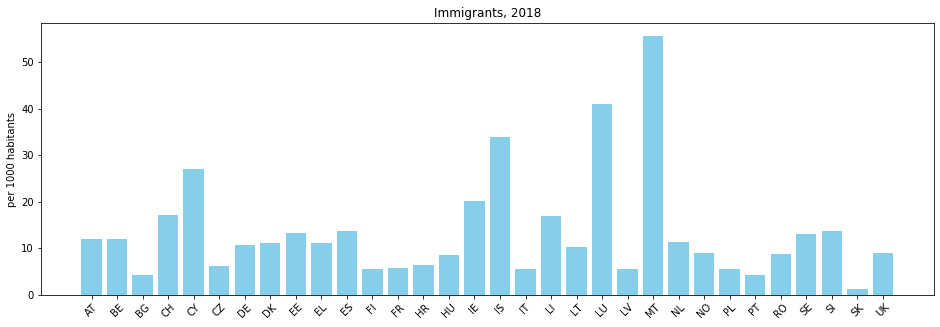

In [18]:
fig = plt.figure(figsize=(16, 5))
ax = plt.axes()
plt.bar(range(len(data_final["im_per_1000"])),data_final["im_per_1000"],width = 0.8, color = 'skyblue')
plt.xticks(range(len(data_final["im_per_1000"])),data_final["geo"], rotation = 45)
plt.ylabel("per 1000 habitants")
plt.title("Immigrants, 2018")
plt.show()

Text(0.5, 1.0, "Exemple d' histogramme simple")

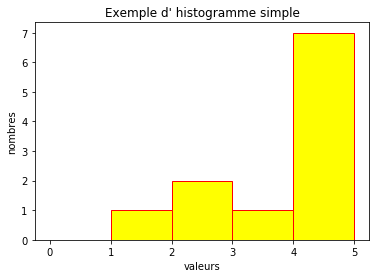

In [19]:
x = [1, 2, 2, 3, 4, 4, 4, 4, 4, 5, 5]
plt.hist(x, range = (0, 5), bins = 5, color = 'yellow',edgecolor = 'red')
plt.xlabel('valeurs') 
plt.ylabel('nombres')
plt.title('Exemple d\' histogramme simple')